In [128]:
path='/home/siddhant/Desktop/data_sets/automobile/1489_2704_bundle_archive'

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
data=pd.read_csv(path+'/auto-mpg.csv')

In [131]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [132]:
#filling the missing values in the horsepower column

data['horsepower'][32]=82
data['horsepower'][126]=70
data['horsepower'][330]=45
data['horsepower'][336]=86
data['horsepower'][354]=75
data['horsepower'][374]=82

/home/siddhant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/siddhant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/siddhant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imp

In [133]:
list_brand=[]
for i in range(398):
    list_brand.append(data['car name'][i].split(" ")[0])

In [134]:
data['brand']=list_brand

In [135]:
data['brand'] = data['brand'].replace(['volkswagen','vokswagen','vw'],'volkswagen')
data['brand'] = data['brand'].replace('maxda','mazda')
data['brand'] = data['brand'].replace('toyouta','toyota')
data['brand'] = data['brand'].replace('mercedes-benz','mercedes')
data['brand'] = data['brand'].replace('nissan','datsun')
data['brand'] = data['brand'].replace('capri','ford')
data['brand'] = data['brand'].replace(['chevroelt','chevy'],'chevrolet')

In [136]:
data['brand'].value_counts()

ford          52
chevrolet     47
plymouth      31
dodge         28
amc           28
toyota        26
datsun        24
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
peugeot        8
fiat           8
audi           7
chrysler       6
volvo          6
renault        5
opel           4
saab           4
subaru         4
mercedes       3
bmw            2
cadillac       2
hi             1
triumph        1
Name: brand, dtype: int64

In [137]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,brand
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


"There are 406 observations on the following 8 variables: 

MPG (miles per gallon), 

cylinders, 

engine displacement (cu. inches),

horsepower,

vehicle weight (lbs.), 

time to accelerate from O to 60 mph (sec.),

model year (modulo 100), 

and origin of car (1. American, 2. European,3-Asian)

In [138]:
#converting cu inches to cu cm(cc)

data['displacement_in_cc']=data['displacement']*16.387 

In [139]:
#converting lbs to kg

data['weight_in_kg']=data['weight']/2.205 

In [140]:
#converting mpg to kpl

data['mileage_kpl']=data['mpg']/2.352  

In [141]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,brand,displacement_in_cc,weight_in_kg,mileage_kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,5030.809,1589.115646,7.653061
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick,5735.450,1674.829932,6.377551
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth,5211.066,1558.276644,7.653061
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc,4981.648,1556.916100,6.802721
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford,4948.874,1564.172336,7.227891


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
mpg                   398 non-null float64
cylinders             398 non-null int64
displacement          398 non-null float64
horsepower            398 non-null object
weight                398 non-null int64
acceleration          398 non-null float64
model year            398 non-null int64
origin                398 non-null int64
car name              398 non-null object
brand                 398 non-null object
displacement_in_cc    398 non-null float64
weight_in_kg          398 non-null float64
mileage_kpl           398 non-null float64
dtypes: float64(6), int64(4), object(3)
memory usage: 40.5+ KB


In [143]:
data['horsepower']=data['horsepower'].astype(int)

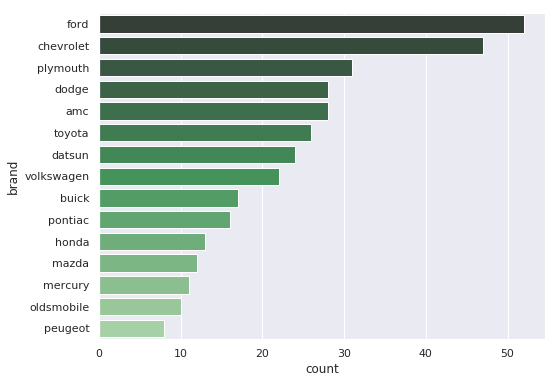

In [211]:
plt.figure(figsize=(8,6))
sns.countplot(y="brand",  data=data, palette="Greens_d",
              order=data.brand.value_counts().iloc[:15].index)

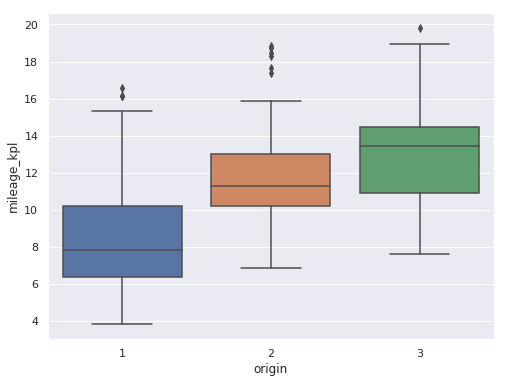

In [212]:
#origin and performance
plt.figure(figsize=(8,6))
sns.boxplot(x=data['origin'],y=data['mileage_kpl']);

1-american origin

2-european origin

3-asian origin

its clear that the origin of the car has a good impact on the mileage,with asian cars dominating the league.

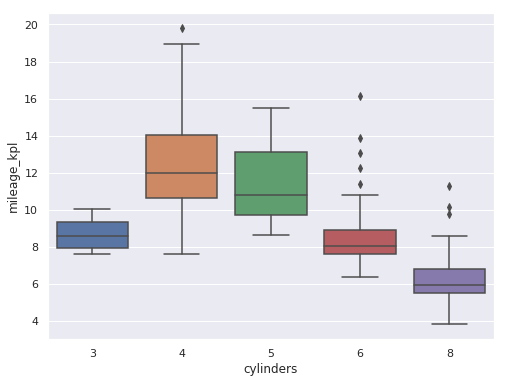

In [213]:
plt.figure(figsize=(8,6))
sns.boxplot(y=data['mileage_kpl'],x=data['cylinders']);

more the number of cylinder means more power which will burn more fuel and thus the mileage decreases.

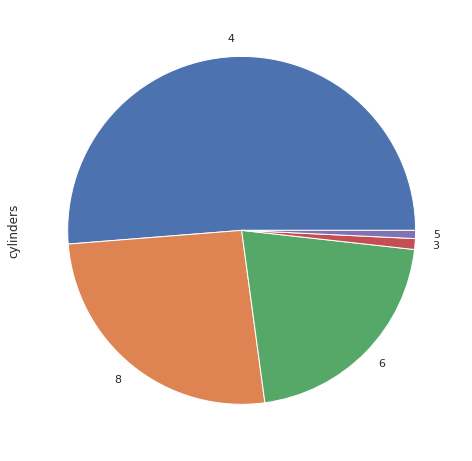

In [147]:
#plotting pie chart for cylinders columns in the dataset

plt.figure(figsize=(14,8))
data.cylinders.value_counts().plot(kind='pie')

clearly we have more numbers of vehicles with 4 ,6 and 8 cylinders and very few examples with 3 and 5 cylinders.

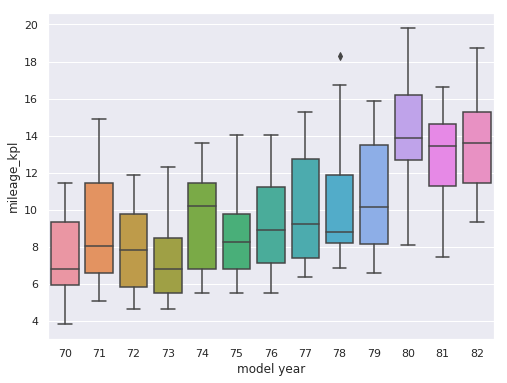

In [214]:
#plotting boxplots to observe the performance over years

plt.figure(figsize=(8,6))
sns.boxplot(x=data['model year'],y=data['mileage_kpl']);

with the technology being updated every moment the performance of the vehicles has increased a lot

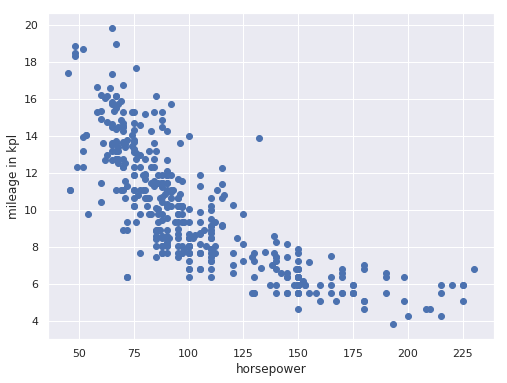

In [218]:
#horsepower and mileage_kpl
plt.figure(figsize=(8,6))
plt.scatter(data.horsepower,data.mileage_kpl)
plt.xlabel('horsepower')
plt.ylabel('mileage in kpl');

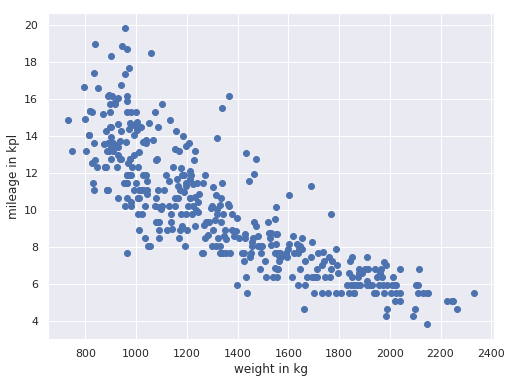

In [219]:
#weight and mileage

plt.figure(figsize=(8,6))
plt.scatter(data.weight_in_kg,data.mileage_kpl)
plt.xlabel('weight in kg')
plt.ylabel('mileage in kpl');

In [149]:
X=data.drop(['displacement','weight','car name','brand','mpg'],axis=1)

In [150]:
X.head()

,cylinders,horsepower,acceleration,model year,origin,displacement_in_cc,weight_in_kg,mileage_kpl
0,8,130,12.0,70,1,5030.809,1589.115646,7.653061
1,8,165,11.5,70,1,5735.450,1674.829932,6.377551
2,8,150,11.0,70,1,5211.066,1558.276644,7.653061
3,8,150,12.0,70,1,4981.648,1556.916100,6.802721
4,8,140,10.5,70,1,4948.874,1564.172336,7.227891


In [151]:
X.corr()

,cylinders,horsepower,acceleration,model year,origin,displacement_in_cc,weight_in_kg,mileage_kpl
cylinders,1.000000,0.841835,-0.505419,-0.348746,-0.562543,0.950721,0.896017,-0.775396
horsepower,0.841835,1.000000,-0.687940,-0.416518,-0.449530,0.896614,0.864081,-0.777768
acceleration,-0.505419,-0.687940,1.000000,0.288137,0.205873,-0.543684,-0.417457,0.420289
model year,-0.348746,-0.416518,0.288137,1.000000,0.180662,-0.370164,-0.306564,0.579267
origin,-0.562543,-0.449530,0.205873,0.180662,1.000000,-0.609409,-0.581024,0.563450
displacement_in_cc,0.950721,0.896614,-0.543684,-0.370164,-0.609409,1.000000,0.932824,-0.804203
weight_in_kg,0.896017,0.864081,-0.417457,-0.306564,-0.581024,0.932824,1.000000,-0.831741
mileage_kpl,-0.775396,-0.777768,0.420289,0.579267,0.563450,-0.804203,-0.831741,1.000000


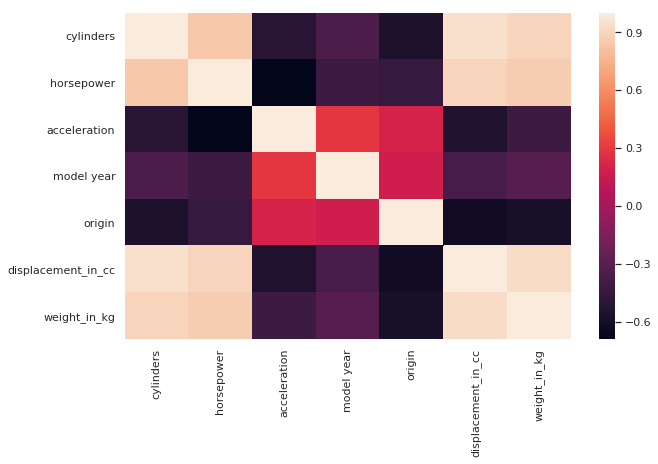

In [220]:
#plot heatmap

plt.figure(figsize=(10,6))
sns.heatmap(X.corr())

In [152]:
print(X.corr()["mileage_kpl"].sort_values(ascending=False))


mileage_kpl           1.000000
model year            0.579267
origin                0.563450
acceleration          0.420289
cylinders            -0.775396
horsepower           -0.777768
displacement_in_cc   -0.804203
weight_in_kg         -0.831741
Name: mileage_kpl, dtype: float64


All these relations are proved by the visualisation we did.

In [155]:
X.head()

,cylinders,horsepower,acceleration,model year,origin,displacement_in_cc,weight_in_kg,mileage_kpl
0,8,130,12.0,70,1,5030.809,1589.115646,7.653061
1,8,165,11.5,70,1,5735.450,1674.829932,6.377551
2,8,150,11.0,70,1,5211.066,1558.276644,7.653061
3,8,150,12.0,70,1,4981.648,1556.916100,6.802721
4,8,140,10.5,70,1,4948.874,1564.172336,7.227891


In [157]:
y=X['mileage_kpl']

In [158]:
X=X.drop(['mileage_kpl'],axis=1)

In [159]:
X.head()

,cylinders,horsepower,acceleration,model year,origin,displacement_in_cc,weight_in_kg
0,8,130,12.0,70,1,5030.809,1589.115646
1,8,165,11.5,70,1,5735.450,1674.829932
2,8,150,11.0,70,1,5211.066,1558.276644
3,8,150,12.0,70,1,4981.648,1556.916100
4,8,140,10.5,70,1,4948.874,1564.172336


In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
lr=LinearRegression()

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [164]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [165]:
y_pred=lr.predict(X_test)

In [166]:
lr.score(X_test,y_test)

0.8172042800113047

In [200]:
lr.predict([[4,120,9.7,90,3,1497,1160]])

array([15.43789367])

In [169]:
X.columns

Index(['cylinders', 'horsepower', 'acceleration', 'model year', 'origin',
       'displacement_in_cc', 'weight_in_kg'],
      dtype='object')

In [174]:
X['displacement_in_cc'].describe()

count     398.000000
mean     3169.669886
std      1708.669838
min      1114.316000
25%      1708.344750
50%      2433.469500
75%      4293.394000
max      7456.085000
Name: displacement_in_cc, dtype: float64

In [176]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

In [177]:
model_rf = RandomForestRegressor(n_estimators=50)

In [178]:
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [179]:
y_pred_rf = model_rf.predict(X_test)
MAE = mean_absolute_error(y_test , y_pred_rf)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  0.859608843537415


In [180]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))


Mean Absolute Error: 0.859608843537415
Mean Squared Error: 1.850446772033644
Root Mean Squared Error: 1.3603112776249573


In [202]:
model_rf.predict([[4,120,9.7,90,3,1497,1160]])

array([12.7542517])

In [186]:
pwd

'/home/siddhant/notebook files/mpg_project'

saving the model for further use

In [194]:
from sklearn.externals import joblib 

/home/siddhant/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [121]:
# Save the model as a pickle in a file 

joblib.dump(lr, 'mileage_model.pkl') 

/home/siddhant/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['mileage_model.pkl']

In [195]:
# Load the model from the file 

lr_model = joblib.load('mileage_model.pkl') 


In [201]:
lr_model.predict([[4,120,9.7,90,3,1497,1160]])

array([15.4409004])